# Vaccination - 10 States US

Imports

In [110]:
import pandas as pd
import folium
from folium import Marker
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

Load & preview 2 datasets

In [111]:
# Population Data
populationData = pd.read_csv(r'C:\Users\Aleks\Desktop\Zarina\Test\VoiceFront/2019_Census_US_Population_Data_By_State_Lat_Long.csv')
populationData.head(10)

,State,PopulationEstimate2019,lat,long
0,Alabama,4903185,32.377716,-86.300568
1,Alaska,731545,58.301598,-134.420212
2,Arizona,7278717,33.448143,-112.096962
3,Arkansas,3017804,34.746613,-92.288986
4,California,39512223,38.576668,-121.493629
5,Colorado,5758736,39.739227,-104.984856
6,Connecticut,3565287,41.764046,-72.682198
7,Delaware,973764,39.157307,-75.519722
8,District of Columbia,705749,38.895110,-77.036370
9,Florida,21477737,30.438118,-84.281296


In [112]:
# Vaccination Data
Vaccination = pd.read_csv('https://raw.githubusercontent.com/owid/covid-19-data/master/public/data/vaccinations/us_state_vaccinations.csv')
Vaccination.head(10)

,date,location,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used
0,2021-01-12,Alabama,78134.0,377025.0,70861.0,0.15,1.59,7270.0,1.45,7.69,NaN,NaN,NaN,0.207
1,2021-01-13,Alabama,84040.0,378975.0,74792.0,0.19,1.71,9245.0,1.53,7.73,5906.0,5906.0,1205.0,0.222
2,2021-01-14,Alabama,92300.0,435350.0,80480.0,NaN,1.88,NaN,1.64,8.88,8260.0,7083.0,1445.0,0.212
3,2021-01-15,Alabama,100567.0,444650.0,86956.0,0.28,2.05,13488.0,1.77,9.07,8267.0,7478.0,1525.0,0.226
4,2021-01-16,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7557.0,7498.0,1529.0,NaN
5,2021-01-17,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7557.0,7509.0,1531.0,NaN
6,2021-01-18,Alabama,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7557.0,7517.0,1533.0,NaN
7,2021-01-19,Alabama,130795.0,444650.0,114319.0,0.33,2.67,16346.0,2.33,9.07,7557.0,7523.0,1534.0,0.294
8,2021-01-20,Alabama,139200.0,483275.0,121113.0,0.37,2.84,17956.0,2.47,9.86,8405.0,7880.0,1607.0,0.288
9,2021-01-21,Alabama,165919.0,493125.0,144429.0,0.44,3.38,21345.0,2.95,10.06,26719.0,10517.0,2145.0,0.336


Merge between two DB and creat new column "percent_vaccinated"

In [113]:
# Vaccination and population data
data = pd.merge(populationData, Vaccination, left_on='State', right_on='location').drop(columns="location")

# Calculate percentage vaccinated by state
data["percent_vaccinated"] = data["people_vaccinated"] / data["PopulationEstimate2019"]

Expolore data

In [114]:
data.describe()

,PopulationEstimate2019,lat,long,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,percent_vaccinated
count,1.085000e+04,10850.000000,10850.000000,1.055000e+04,1.055000e+04,1.054000e+04,10489.000000,10550.000000,1.048900e+04,10540.000000,10550.000000,10800.000000,10800.000000,10800.000000,10550.000000,10540.000000
mean,6.175719e+06,39.338287,-93.531507,3.864659e+06,4.771253e+06,2.256477e+06,28.011479,63.111139,1.701438e+06,36.541856,77.636660,29542.800093,29562.931852,4716.246667,0.778152,0.365418
std,7.122297e+06,5.650930,18.418587,5.713930e+06,6.882972e+06,3.276430e+06,18.244477,35.910255,2.599966e+06,18.992351,40.926419,50020.851137,44037.078211,2980.029374,0.112410,0.189924
min,5.787590e+05,21.307442,-157.857376,1.646700e+04,4.780000e+04,1.957000e+03,0.000000,1.350000,5.000000e+00,0.280000,6.140000,-331640.000000,-35113.000000,-16746.000000,0.149000,0.002773
25%,1.787065e+06,35.780430,-104.820236,7.423395e+05,9.587900e+05,4.554902e+05,10.520000,29.985000,2.787970e+05,19.455000,38.595000,4209.750000,6207.000000,2198.750000,0.737000,0.194565
50%,4.342705e+06,39.753925,-89.918533,1.908962e+06,2.431618e+06,1.185942e+06,30.230000,68.845000,7.933580e+05,39.630000,88.560000,12770.500000,14860.000000,4136.000000,0.799000,0.396283
75%,7.278717e+06,42.733635,-78.639099,4.754623e+06,5.870712e+06,2.791786e+06,42.920000,91.070000,2.128284e+06,50.800000,109.000000,34894.000000,36476.250000,6741.250000,0.851000,0.507974
max,3.951222e+07,58.301598,-69.781693,4.658559e+07,5.259338e+07,2.649638e+07,68.030000,141.020000,2.146825e+07,76.190000,157.610000,805477.000000,494575.000000,22621.000000,1.027000,0.761937


In [115]:
# states (There is no New york as ask in the task so I choose New Jersey insted)
data['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'North Carolina', 'North Dakota',
       'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island',
       'South Carolina', 'South Dakota', 'Tennessee', 'Texas', 'Utah',
       'Vermont', 'Virginia', 'Washington', 'West Virginia', 'Wisconsin',
       'Wyoming'], dtype=object)

Today is the 14th of August 2021 & department is in charge of the 10 American states

In [116]:
data_14Aug2021= data[(data['date'] == '2021-08-14')]
data_14Aug2021 = data_14Aug2021[data_14Aug2021.State.isin(['Alabama','Arizona','Massachusetts',\
                                                           'New Jersey','California','Ohio','Texas',\
                                                           'Oklahoma','Georgia','Oregon' ])]
data_14Aug2021 = data_14Aug2021.set_index('State')
data_14Aug2021

,PopulationEstimate2019,lat,long,date,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,percent_vaccinated
State,,,,,,,,,,,,,,,,,
Alabama,4903185,32.377716,-86.300568,2021-08-14,3769434.0,5554810.0,2260327.0,35.22,76.88,1726776.0,46.10,113.29,5324.0,9995.0,2038.0,0.679,0.460992
Arizona,7278717,33.448143,-112.096962,2021-08-14,7308847.0,8868770.0,3992849.0,46.34,100.41,3373163.0,54.86,121.85,24619.0,16042.0,2204.0,0.824,0.548565
California,39512223,38.576668,-121.493629,2021-08-14,46378183.0,52591445.0,26371608.0,54.12,117.38,21382685.0,66.74,133.10,91489.0,86593.0,2192.0,0.882,0.667429
Georgia,10617423,33.749027,-84.388229,2021-08-14,9209838.0,12292545.0,5105798.0,39.41,86.74,4184634.0,48.09,115.78,695.0,18370.0,1730.0,0.749,0.480889
Massachusetts,6892503,42.358162,-71.063698,2021-08-14,9277892.0,10173240.0,5094960.0,64.74,134.61,4462455.0,73.92,147.60,12997.0,9650.0,1400.0,0.912,0.739203
New Jersey,8882190,40.220596,-74.769913,2021-08-14,10630697.0,12481395.0,6025025.0,59.58,119.69,5292288.0,67.83,140.52,18982.0,18185.0,2047.0,0.852,0.678327
Ohio,11689100,39.961346,-82.999069,2021-08-14,11311690.0,13297215.0,5973630.0,47.23,96.77,5520799.0,51.10,113.76,26795.0,16672.0,1426.0,0.851,0.511043
Oklahoma,3956971,35.492207,-97.503342,2021-08-14,3602786.0,4371800.0,1996864.0,41.41,91.05,1638478.0,50.46,110.48,13861.0,10548.0,2666.0,0.824,0.504645
Oregon,4217737,44.938461,-123.030403,2021-08-14,4830859.0,5945805.0,2617909.0,56.79,114.54,2395283.0,62.07,140.97,8708.0,6673.0,1582.0,0.812,0.620690


Analysis of vaccination rate per state 

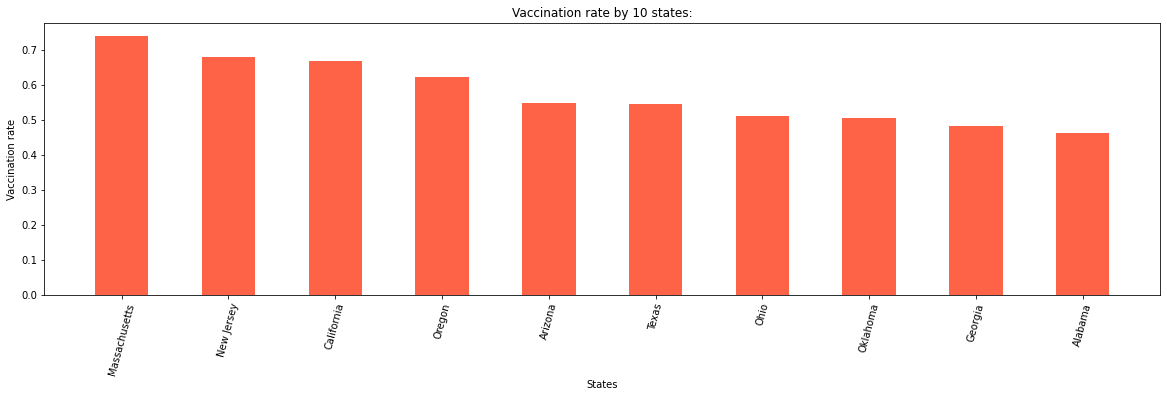

In [117]:
x = data_14Aug2021[['percent_vaccinated']].sort_values('percent_vaccinated', ascending =False)

x_axis = x.index
y_axis = x['percent_vaccinated']

fig = plt.figure(figsize = (20, 5))
plt.bar(x_axis, y_axis, color ='tomato', width = 0.5)
plt.xticks(rotation = 75)
plt.xlabel('States')
plt.ylabel('Vaccination rate')
plt.title('Vaccination rate by 10 states:')
plt.show()

In [118]:
# Calculate the total percent vaccinated in the 10 states of US
percentageTotal = data_14Aug2021["people_vaccinated"].sum() / data_14Aug2021["PopulationEstimate2019"].sum()
print('Percentage Vaccinated in the 10 states of US: {}%'.format(round(percentageTotal*100, 2))) 

Percentage Vaccinated in the 10 states of US: 59.25%


Visualization - Create the map

In [119]:
v_map = folium.Map(location=[42.32,-71.0589], tiles='cartodbpositron', zoom_start=3.5) 

# 10 points to the map
mc = MarkerCluster()
for idx, row in data_14Aug2021.iterrows(): 
    if not math.isnan(row['long']) and not math.isnan(row['lat']):
        mc.add_child(Marker(location=[row['lat'], row['long']],
                            tooltip=str(round(row['percent_vaccinated']*100, 2))+"%"))
v_map.add_child(mc)

# Display the map
v_map

Target of 80%

In [120]:
# create addition column of the target
data_14Aug2021['Target_80%'] = 0.8-data_14Aug2021['percent_vaccinated']

#Display the percentage to get the target
data_14Aug2021[['Target_80%']].sort_values('Target_80%',ascending = False)

,Target_80%
State,
Alabama,0.339008
Georgia,0.319111
Oklahoma,0.295355
Ohio,0.288957
Texas,0.255900
Arizona,0.251435
Oregon,0.179310
California,0.132571
New Jersey,0.121673


The month with the best performing for each state in the last 6 months

In [121]:
data_2 = data[data.State.isin(['Alabama','Arizona','Massachusetts',\
                               'New Jersey','California','Ohio','Texas',\
                               'Oklahoma','Georgia','Oregon' ]) & (data['date'] > '2021-02-14')]
data_2['month'] = pd.DatetimeIndex(data_2['date']).month
data_2.head()

<ipython-input-121-6119a7709563>:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,State,PopulationEstimate2019,lat,long,date,total_vaccinations,total_distributed,people_vaccinated,people_fully_vaccinated_per_hundred,total_vaccinations_per_hundred,people_fully_vaccinated,people_vaccinated_per_hundred,distributed_per_hundred,daily_vaccinations_raw,daily_vaccinations,daily_vaccinations_per_million,share_doses_used,percent_vaccinated,month
34,Alabama,4903185,32.377716,-86.300568,2021-02-15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12214.0,22405.0,4569.0,NaN,NaN,2
35,Alabama,4903185,32.377716,-86.300568,2021-02-16,636682.0,1015775.0,486206.0,3.04,12.99,149288.0,9.92,20.72,12214.0,20816.0,4245.0,0.627,0.099161,2
36,Alabama,4903185,32.377716,-86.300568,2021-02-17,650020.0,1032175.0,494424.0,3.15,13.26,154341.0,10.08,21.05,13338.0,19174.0,3911.0,0.630,0.100837,2
37,Alabama,4903185,32.377716,-86.300568,2021-02-18,672038.0,1032175.0,505660.0,3.37,13.71,165104.0,10.31,21.05,22018.0,18400.0,3753.0,0.651,0.103129,2
38,Alabama,4903185,32.377716,-86.300568,2021-02-19,739132.0,1077600.0,545431.0,3.92,15.07,192304.0,11.12,21.98,67094.0,24002.0,4895.0,0.686,0.111240,2


Visualization

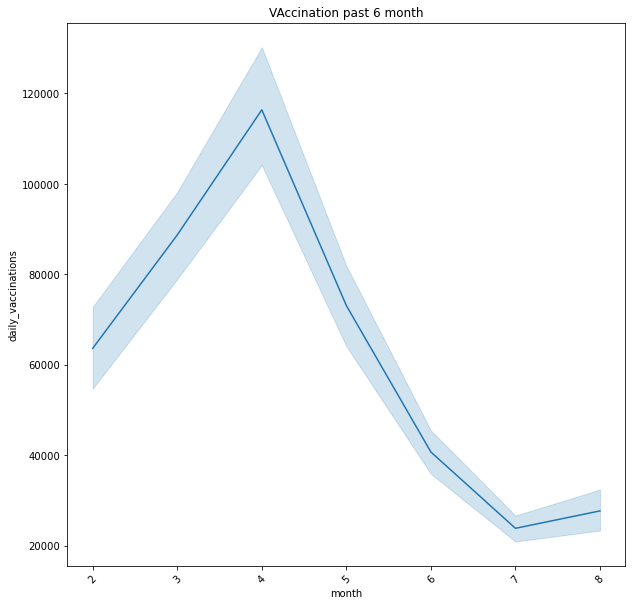

In [122]:
#Lineplot 
fig = plt.figure(figsize = (10, 10))
sns.lineplot(data=data_2, x="month", y="daily_vaccinations")
plt.title('VAccination past 6 month')
plt.xticks(rotation = 45);

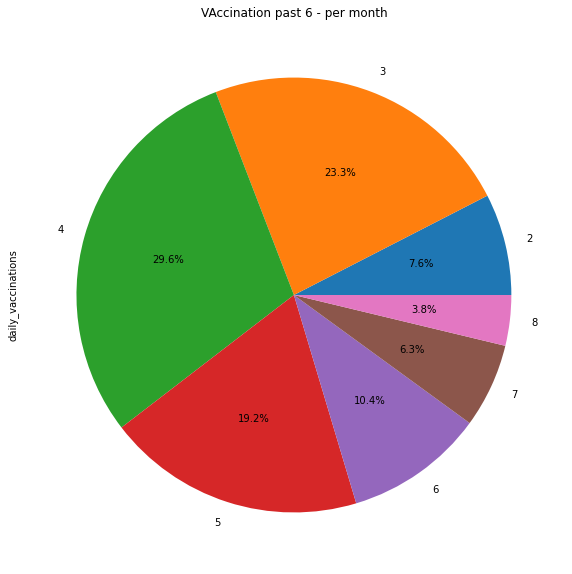

In [123]:
# Pie plot
group = data_2.groupby('month')['daily_vaccinations'].sum()
fig = plt.figure(figsize = (10, 10))
plt.title('VAccination past 6 - per month')
group.plot.pie(autopct="%.1f%%");

In [124]:
fig = px.line(data_2, x = 'date', y ='daily_vaccinations', color = 'State')
fig.update_layout(
    title={
            'text' : "Daily vaccination trend",
            'y':0.95,
            'x':0.5
        },
    xaxis_title="Date",
    yaxis_title="Daily Vaccinations"
)
fig.show()